# Chapter01 线性回归
## 2.1 最小二乘法
- $N$ 为正整数，对于给定的数对 $(x_{1},y_{1}),\cdots, (x_{N},y_{N})\in \mathbb{R}\times \mathbb{R}$，可以通过最小二乘法得出一个截距 $\beta_{0}$ 和斜率 $\beta_{1}$
- 最小二乘的**中心思想**
$$
\min L = \sum_{i=1}^{N}(y_{i} - \beta_{0} - \beta_{1}x_{i})^{2} = \Vert \boldsymbol{y} - \boldsymbol{X}\hat{\boldsymbol{\beta}} \Vert^{2}
$$

### 2.1.1 求法 
- 逐个求偏导
$$
\begin{array}{cc}
  \begin{cases}
    \displaystyle \frac{\partial{L}}{\partial{\beta_{0}}} =-2 \sum_{i=1}^{N}(y_{i} - \beta_{0} - \beta_{1}x_{i})= 0	\\
    \displaystyle \frac{\partial{L}}{\partial{\beta_{1}}} =-2 \sum_{i=1}^{N}x_{i}(y_{i} - \beta_{0} - \beta_{1}x_{i})= 0	\\
  \end{cases} 
  \\\\ \big\Downarrow \\\\
  \begin{cases}
    \displaystyle	\bar{y} - \beta_{0} - \beta_{1}\bar{x} = 0 & (1)\\
    \displaystyle	\sum_{i=1}^{N}x_{i}y_{i} - \beta_{0}\bar{x} - \beta_{1}\sum_{i=1}^{N}x_{i}^{2} = 0 & (2)\\
  \end{cases}\xrightarrow{(2)-\bar{x}(1)} \displaystyle \text{Cov}(x,y)-\beta_{1}D(x) =0
  \\\\ \big\Downarrow \\\\
  \begin{cases}
    \displaystyle	\hat{\beta}_{1} = \frac{\text{Cov}(x,y)}{D(x)} = \frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sum_{i=1}^{N}(x_{i}-\bar{x})^{2}}\\
    \displaystyle	\hat{\beta}_{0} = \bar{y} - \hat{\beta}_{1}\bar{x}\\
  \end{cases}
\end{array}
$$

In [1]:
using Plots, Random, Statistics, LinearAlgebra
function min_sq(x::Array, y::Array)
    x_bar, y_bar = mean(x), mean(y)
    beta_1 = (x .- x_bar)' * (y .- y_bar) ./ norm(x .- x_bar)^2
    beta_0 = y_bar - beta_1 * x_bar
    return [beta_1, beta_0]'
end

min_sq (generic function with 1 method)

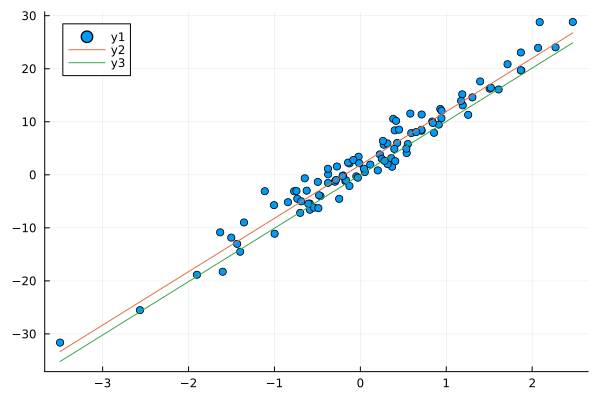

In [2]:
using Plots, Random, Statistics, LinearAlgebra

N = 100;
x0 = randn(N);
y0 = 10 .* x0 .+ 2randn(N) .+ 2 * ones(N)
x1 = x0 .- mean(x0) * ones(N);
y1 = y0 .- mean(y0) * ones(N);

f(x) = min_sq(x0, y0) * [x, 1]
f1(x) = min_sq(x1, y1) * [x, 1]
scatter(x0, y0)
plot!(x -> f(x))
plot!(x -> f1(x))

- 线性代数的解释（最小二乘法的线代思想）
    1. 求解方程组 $\boldsymbol{\beta}$ 为未知数
    $$
    \boldsymbol{X\beta} = \boldsymbol{y}
    $$
    2. 当该方程组无解时，需要寻找最优解使得
    $$
    \min L = \Vert \boldsymbol{y} - \boldsymbol{X\hat{\beta}}\Vert
    $$
    3. 当 $\boldsymbol{y} - \boldsymbol{X\hat{\beta}}$ 与 $\boldsymbol{X}$ 正交时取得最优解，既
    $$
    \boldsymbol{X}^{\text{T}}(\boldsymbol{y} - \boldsymbol{X \hat{\beta}}) = \boldsymbol{0}
    $$
    4. 解得
    $$
    \boldsymbol{\hat{\beta}} = (\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{X}^{\text{T}}\boldsymbol{y}
    $$


In [3]:
function min_sq_matrix(X::Matrix, y::Array)
    return (X' * X)^(-1) * X' * y
end

min_sq_matrix (generic function with 1 method)

In [4]:
using Plots, Random, Statistics, LinearAlgebra
Random.seed!(1)

n = 100;
p = 2;
beta = [1, 2, 4];
x = randn(n, 2)
X = hcat(ones(n), x);
y = reduce(+, [beta[i] .* X[:, i] for i = 1:3])
inv(transpose(X) * X) * transpose(X) * y


3-element Vector{Float64}:
 1.0
 1.9999999999999996
 3.9999999999999987

## 2.2 $\boldsymbol{\hat{\beta}}$的分布
- 首先，我们有如下假设 $\boldsymbol{y}, \boldsymbol{\epsilon} \in \mathbb{R}^{N}, \boldsymbol{X}\sim \mathbb{R}^{N\times (p+1)}, \boldsymbol{\beta}\sim \mathbb{R}^{p+1}$
    $$
    \boldsymbol{y} = \boldsymbol{X\beta} + \boldsymbol{\epsilon}
    $$
    1. 其中的 $\boldsymbol{\beta}$ 是未知的，且与 $\boldsymbol{\hat{\beta}}$ 无关，$\boldsymbol{\hat{\beta}}$ 仅为通过最小二乘法估计所得的估计值
    2. $\epsilon_i$ 相互独立，且服从于正态分布 $\epsilon_i\sim \mathcal{N}(0,\sigma^2)$
    3. 故 $\epsilon_1,\cdots,\epsilon_N$ 的联合分布
    $$
    f(\boldsymbol{\epsilon}) = \prod_{i=1}^{N}f_{i}(\epsilon_{i}) = \frac{1}{(2\pi\sigma^{2})^{N/2}}\exp\left\{-\frac{\boldsymbol{\epsilon}^{\text{T}}\boldsymbol{\epsilon}}{2\sigma^{2}}\right\}
    $$
    4. 因此 $\boldsymbol{\epsilon}\sim \mathcal{N}(0, \sigma^{2}\boldsymbol{I})$ ($\boldsymbol{I}$ 为 $N$ 阶单位矩阵 )
        - $E(\boldsymbol{\epsilon\epsilon}^{\text{T}}) = \sigma^{2}\boldsymbol{I}$ 
    5. 将 $\boldsymbol{y} = \boldsymbol{X \beta} + \boldsymbol{\epsilon}$ 带入 $\boldsymbol{\hat{\beta}} = (\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{X}^{\text{T}}\boldsymbol{y}$ 可得
    $$\begin{split}
    \boldsymbol{\hat{\beta}} & = (\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{X}^{\text{T}}(\boldsymbol{X\beta} + \boldsymbol{\epsilon}) \\
    & = \boldsymbol{\beta} + (\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{X}^{\text{T}}\boldsymbol{\epsilon}
    \end{split}$$
    6. 其中，可将 $(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{X}^{\text{T}}$ 视为常数，故可得 $\boldsymbol{\hat{\beta}}$ 的期望：
    $$
    E(\boldsymbol{\hat{\beta}}) = \boldsymbol{\beta} + \boldsymbol{0} = \boldsymbol{\beta}
    $$
    7. $\boldsymbol{\hat{\beta}}$ 的协方差矩阵
    $$
    \begin{split}
    E& 
    \left[
    \begin{matrix}
      (\boldsymbol{\hat{\beta}}_{0} - \boldsymbol{\beta}_{0})^{2} & (\boldsymbol{\hat{\beta}}_{0} - \boldsymbol{\beta}_{0})(\boldsymbol{\hat{\beta}}_{1} - \boldsymbol{\beta}_{1}) &\cdots &(\boldsymbol{\hat{\beta}}_{0} - \boldsymbol{\beta}_{0})(\boldsymbol{\hat{\beta}}_{p} - \boldsymbol{\beta}_{p})\\
    (\boldsymbol{\hat{\beta}}_{1} - \boldsymbol{\beta}_{1})(\boldsymbol{\hat{\beta}}_{0} - \boldsymbol{\beta}_{0}) & (\boldsymbol{\hat{\beta}}_{1} - \boldsymbol{\beta}_{1})^{2} & \cdots & (\boldsymbol{\hat{\beta}}_{1} - \boldsymbol{\beta}_{1})(\boldsymbol{\hat{\beta}}_{p} - \boldsymbol{\beta}_{p})\\
    \vdots &\vdots &\ddots & \vdots \\
    (\boldsymbol{\hat{\beta}}_{p} - \boldsymbol{\beta}_{p})(\boldsymbol{\hat{\beta}}_{0} - \boldsymbol{\beta}_{0}) & (\boldsymbol{\hat{\beta}}_{p} - \boldsymbol{\beta}_{p})(\boldsymbol{\hat{\beta}}_{1} - \boldsymbol{\beta}_{1}) & \cdots & (\boldsymbol{\hat{\beta}}_{p} - \boldsymbol{\beta}_{p})^{2}\\
    \end{matrix}
    \right]\\
    &= E(\boldsymbol{\hat{\beta}}-\boldsymbol{\beta})(\boldsymbol{\hat{\beta}-\boldsymbol{\beta}})^{\text{T}} = E(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{X}^{\text{T}}\boldsymbol{\epsilon}\{(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{X}^{\text{T}}\boldsymbol{\epsilon}\}^{\text{T}} \\
    & \xlongequal{E (\boldsymbol{\epsilon\epsilon}^{\text{T}}) = \sigma^{2}\boldsymbol{I}} \sigma^{2}(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}
    \end{split}
    $$
    8. 因此
    $$
    \boldsymbol{\hat{\beta}} \sim \mathcal{N}(\boldsymbol{\beta}, \sigma^{2}(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1})
    $$
    
    
    
    


## 2.3 $\text{RSS}$值的分布 
- **Hat Matrix**
    - **定义** $\boldsymbol{H} \coloneqq \boldsymbol{X}(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{X}^{\text{T}}\in \mathbb{R}^{N\times N}$ 
    - **性质** 
        1. $\boldsymbol{H}^{2} = \boldsymbol{H}$
        2. $(\boldsymbol{I} -\boldsymbol{H})^{2} = \boldsymbol{I} - \boldsymbol{H}$
        3. $\boldsymbol{HX} = \boldsymbol{X}$
- 由 $\boldsymbol{\hat{y}} = \boldsymbol{X \hat{\beta}}$ 和 $\boldsymbol{\hat{\beta}} = (\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{X}^{\text{T}}\boldsymbol{y}$，可得 $\boldsymbol{\hat{y}} = \boldsymbol{Hy}$ 故可得
  $$
  \begin{split}
  \boldsymbol{y} - \boldsymbol{\hat{y}} &= (\boldsymbol{I} - \boldsymbol{H})\boldsymbol{y} = (\boldsymbol{I} - \boldsymbol{H})(\boldsymbol{X\beta} +\boldsymbol{\epsilon})\\
  &= (\boldsymbol{X} - \boldsymbol{HX})\boldsymbol{\beta} + (\boldsymbol{I} - \boldsymbol{H}) \boldsymbol{\epsilon} \\
  & = (\boldsymbol{I} - \boldsymbol{H})\boldsymbol{\epsilon}
  \end{split}
  $$
- $\text{RSS}$的定义
  $$
  \begin{split}
    \text{RSS} &\coloneqq \Vert \boldsymbol{y} - \boldsymbol{\hat{y}}\Vert^{2}  = \{(\boldsymbol{I}-\boldsymbol{H})\boldsymbol{\epsilon}\}^{\text{T}}(\boldsymbol{I} - \boldsymbol{H})\boldsymbol{\epsilon}  \\
    & =\boldsymbol{\epsilon}^{\text{T}}(\boldsymbol{I} - \boldsymbol{H})^{2}\boldsymbol{\epsilon} = \boldsymbol{\epsilon}^{\text{T}}(\boldsymbol{I} - \boldsymbol{H})\boldsymbol{\epsilon}
  \end{split}
  $$
- **命题 13**: $\boldsymbol{H}$ 和 $\boldsymbol{I}- \boldsymbol{H}$ 的特征值仅可能为 $0$ 或 $1$，且 $1$ 和 $0$ 分别为 $\boldsymbol{H}$ 和 $\boldsymbol{I} - \boldsymbol{H}$ 的 $p+1$ 重特征值，因此 $0$ 和 $1$ 分别为$\boldsymbol{H}$ 和 $\boldsymbol{I} - \boldsymbol{H}$ 的 $N-p-1$ 重特征值
- 由于 $\boldsymbol{H}$ 和 $\boldsymbol{I} - \boldsymbol{H}$ 为实对称矩阵，故存在正交阵 $\boldsymbol{P}\in \mathbb{R}^{N\times N}$ 可将二者对角化
  $$
  \boldsymbol{P}(\boldsymbol{I} - \boldsymbol{H}) \boldsymbol{P}^{\text{T}} = \text{diag}(
  \underbrace{1,\cdots,1}_{N-p-1},\underbrace{0,\cdots,0}_{p+1})
  $$
- 定义 $\boldsymbol{v} \coloneqq \boldsymbol{P\epsilon}\in \mathbb{R}^{N}\Rightarrow \boldsymbol{\epsilon} = \boldsymbol{P}^{\text{T}}\boldsymbol{v}$ 可得
    $$
    \begin{split}
    \text{RSS} &= \boldsymbol{\epsilon}^{\text{T}}(\boldsymbol{I} - \boldsymbol{H})\boldsymbol{\epsilon} = (\boldsymbol{P}^{\text{T}}\boldsymbol{v})^{\text{T}}(\boldsymbol{I} - \boldsymbol{H})\boldsymbol{P}^{\text{T}}\boldsymbol{v}\\
    &=\boldsymbol{v}^{\text{T}}\boldsymbol{P}^{}(\boldsymbol{I-\boldsymbol{H}})\boldsymbol{P}^{\text{T}}\boldsymbol{v} \\
    & = 
    \begin{bmatrix}
      v_{1} & \cdots& v_{N-p-1} & v_{N-p} & \cdots & v_{n}
    \end{bmatrix}
    \begin{bmatrix}
      1 & 0 & \cdots & \cdots & \cdots & 0 \\
      0 & \ddots & 0 & \cdots & \cdots & \vdots \\
      \vdots & 0 & 1 & 0 & \cdots & 0 \\
      \vdots & \vdots & 0 & 0 & \cdots & \vdots \\
      \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
      0 & \cdots & 0 & \cdots & \cdots & 0 \\
    \end{bmatrix}
    \begin{bmatrix}
      v_{1} \\ \vdots\\ v_{N-p-1} \\ v_{N-p} \\ \vdots \\ v_{n}
    \end{bmatrix} \\
    & = \sum_{i=1}^{N-p-1} v_{i}^{2}
    \end{split}
    $$
  - $\boldsymbol{v} = \boldsymbol{P\epsilon}\Rightarrow E(\boldsymbol{v}) = E(\boldsymbol{P\epsilon}) = 0$
  - $E(\boldsymbol{vv}^{\text{T}}) = E(\boldsymbol{P\epsilon}(\boldsymbol{P\epsilon})^{\text{T}}) =  \boldsymbol{P}E(\boldsymbol{\epsilon\epsilon}^{\text{T}})\boldsymbol{P^{\text{T}}} = \sigma^{2}\boldsymbol{\tilde{I}}, \quad\boldsymbol{\tilde{I}}=\text{diag}(\underbrace{1,\cdots,1}_{N-p-1},\underbrace{0,\cdots,0}_{p+1})$
  - 因此，可得 $\text{RSS}/\sigma^{2}$ 的分布
  $$
  \frac{\text{RSS}}{\sigma^{2}} \sim \chi^{2}_{N-p-1}
  $$

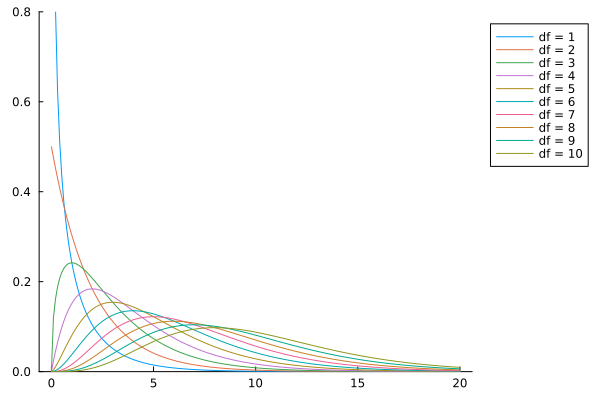

In [5]:
using Plots, Distributions
x = collect(0:0.1:20);

default(ylims = [0, 0.8], grid = :none, legend = :outertopright)
fig = plot()
for i = 1:10
    plot!(x, pdf.(Chisq(i), x), label = "df = $i")
end
plot(fig)


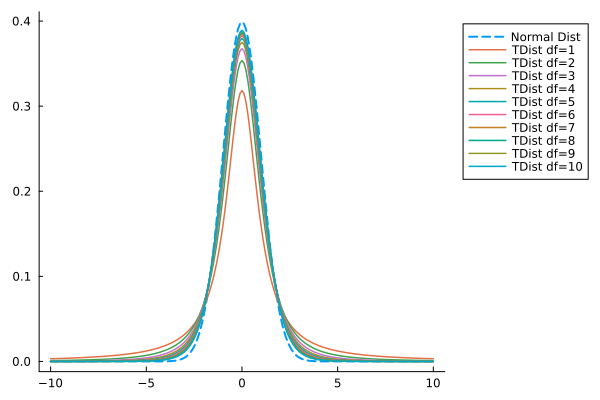

In [6]:
using Plots, Distributions
x = collect(-10:0.1:10)
default()
default(legend = :outertopright, grid = :none)
fig = plot(x, pdf.(Normal(), x), label = "Normal Dist", lw = 2, ls=:dash)
for i = 1:10
    plot!(x, pdf.(TDist(i), x), label = "TDist df=$i", lw = 1.5)
end
plot(fig)


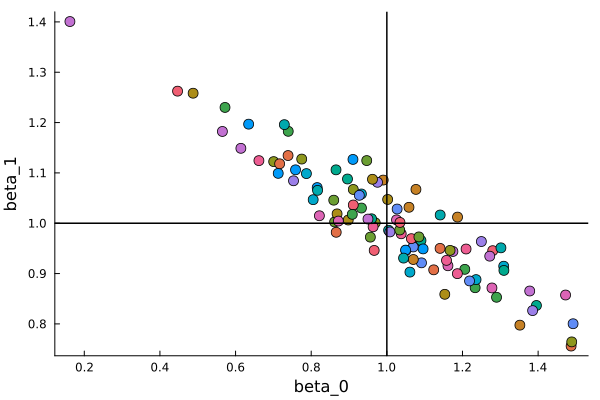

In [7]:
N = 100;
p = 1;
iter_num = 100
default()
default(ms = 5.5)
fig = plot(grid = :none, xlabel="beta_0",ylabel="beta_1")
for i = 1:iter_num
    x = randn(N) .+ 2
    e = randn(N)
    y = x .+ 1 .+ e
    b_1, b_0 = min_sq(x, y)
    scatter!([b_0], [b_1], label = "")
end
hline!([1], c = :black, lw = 1.5, label = "")
vline!([1], c = :black, lw = 1.5, label = "")
plot(fig)


## 2.4 对 $\boldsymbol{\hat{\beta}}_j\ne 0$ 的假设检验
### 2.4.1 $\sigma$ 的估计值 $\hat{\sigma}$
$$
\hat{\sigma} = \sqrt{\frac{\text{RSS}}{N-p-1}}
$$

### 2.4.2 $\hat{\beta}_{j}$ 的标准差
$$
SE(\hat{\beta}_{j}) = \hat{\sigma}\sqrt{\boldsymbol{B}_{j}}
$$
- $\boldsymbol{B}_{j}$ 为 $(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}$ 第 $j$ 个对角元素

### 2.4.3 $t$分布
- $t$ 分布结论
  $$
  t = \frac{\boldsymbol{\hat{\beta}}_{j} - \boldsymbol{\beta}_{j}}{SE(\boldsymbol{\hat{\beta}}_{j})} = \frac{\boldsymbol{\hat{\beta}}_{j} - \boldsymbol{\beta}_{j}}{\hat{\sigma}\sqrt{\boldsymbol{B}_{j}}} = \frac{\boldsymbol{\hat{\beta}}_{j} - \boldsymbol{\beta}_{j}}{\sqrt{\text{RSS}/(N-p-1)}\sqrt{\boldsymbol{B}_{j}}}  \sim t_{N-p-1}
  $$
- $t$ 分布证明
  $$
  \begin{array}{ll}
    \because & \boldsymbol{\hat{\beta}} \sim \mathcal{N}(\boldsymbol{\beta}, \sigma^{2}(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}) \\
    \therefore & \boldsymbol{\hat{\beta}}_{j} \sim \mathcal{N}(\boldsymbol{\beta}_{j},\sigma^{2}\boldsymbol{B}_{j})\\
    & U\coloneqq\displaystyle \frac{\boldsymbol{\hat{\beta}}_{j} - \boldsymbol{\beta}_{j}}{\sigma\sqrt{\boldsymbol{B}_{j}}} \sim \mathcal{N}(0,1) \\
    \because & V\coloneqq\text{RSS}/\sigma^{2} \sim \chi^{2}_{N-p-1} \\
    \therefore & \displaystyle \frac{\boldsymbol{\hat{\beta}}_{j}-\boldsymbol{\beta}_{j}}{\sigma \sqrt{\boldsymbol{B}_{j}}}/\sqrt{\frac{\text{RSS}/\sigma^{2}}{N-p-1}} = \frac{U}{\sqrt{V/( N-p-1 )}} = \frac{\boldsymbol{\hat{\beta}}_{j} - \boldsymbol{\beta}_{j}}{\hat{\sigma}\sqrt{\boldsymbol{B}_{j}}} \sim t_{N-p-1} \\
  \end{array}
  $$
- $U,V$ 独立性证明 
    - 欲证明 $U,V$ 的独立性，就需要看二者的协方差矩阵，由于 $U$ 的变异来源于 $\boldsymbol{\hat{\beta}}_{j} - \boldsymbol{\beta}_{j}$，$V(\text{RSS})$ 的变异来源于 $\boldsymbol{\hat{y}} - \boldsymbol{y}$ 故仅用查看 $E(\boldsymbol{\hat{\beta}} - \boldsymbol{\beta})(\boldsymbol{\hat{y}}-\boldsymbol{y})^{\text{T}}$ 
    $$
    \begin{array}{ll}
      \because & \begin{cases}
        \boldsymbol{\hat{\beta}} = (\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{X}^{\text{T}}\boldsymbol{y}	\\
        \boldsymbol{y} = \boldsymbol{X\beta} +\boldsymbol{\epsilon} \\
        \boldsymbol{\hat{y}} = \boldsymbol{X \hat{\beta}}
      \end{cases} \Rightarrow \begin{cases}
        \boldsymbol{\hat{y}} - \boldsymbol{y} = (\boldsymbol{I} - \boldsymbol{H})\boldsymbol{\epsilon}	\\
        \boldsymbol{\hat{\beta}} - \boldsymbol{\beta} = (\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{X}^{\text{T}}\boldsymbol{\epsilon}
      \end{cases} \\
      \therefore & 
      E(\boldsymbol{\hat{\beta}} - \boldsymbol{\beta})(\boldsymbol{\hat{y}}-\boldsymbol{y})^{\text{T}} = E(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{X}^{\text{T}}\boldsymbol{\epsilon\epsilon}^{\text{T}}(\boldsymbol{I} - \boldsymbol{H})^{\text{T}}  \\
      & = \sigma^{2}(\boldsymbol{X}^{\text{T}} \boldsymbol{X})^{-1}[(\boldsymbol{I} - \boldsymbol{H})\boldsymbol{X}]^{\text{T}} \\
      & = \boldsymbol{0}
    \end{array}
    $$
    - 故 $U,V$ 二者相互独立


### Appendix Compare with Python

In [8]:
using Random, Plots, LinearAlgebra, Distributions, CSV, DataFrames, Statistics, LaTeXStrings
df = DataFrame(CSV.File("../data/linearRegression.csv"));
x = df[:,:x]; y = df[:,:y];
N = length(x)

100

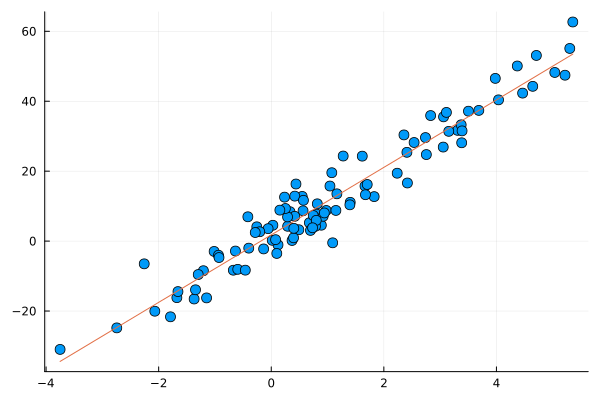

In [9]:
# N=100;
# x = rand(Normal(1,2),N);
# e = rand(Normal(0,5),N);
# y = 10x .+ 2 + e

f(xx) = min_sq(x,y)*[xx,1]
scatter(x,y);
plot!(x->f(x), legend=:none)

In [10]:
X = hcat(ones(N),x);
pa1 = size(X)[2];

beta = (X' * X)^(-1) * X' * y;
RSS = norm(y - X * beta)^2;
RSE = sqrt(RSS / (N - pa1));
B = (X' * X)^(-1);
# B_1, B_0 = diag(B);
se = RSE * sqrt.(diag(B));
t = beta ./ se;
p = 2 * (1 .- cdf.(TDist(N - pa1), abs.(t)));

In [11]:
println(["beta_$(i-1) = $j\n" for (i,j) in enumerate(beta)]...)
println("RSS = $RSS\n RSE=$RSE\n")
println(["B_$(i-1) = $j\n" for (i,j) in enumerate(diag(B))]...)
println(["se_$(i-1) = $j\n" for (i,j) in enumerate(se)]...)
println(["t_$(i-1) = $j\n" for (i,j) in enumerate(t)]...)
println(["p_$(i-1) = $j\n" for (i,j) in enumerate(p)]...)

beta_0 = 1.7865684048041004
beta_1 = 9.650138474091017

RSS = 2297.1878080458337
 RSE=4.8415588314958065

B_0 = 0.013061999584726936
B_1 = 0.002749777292935774

se_0 = 0.5533374269914654
se_1 = 0.2538832061580988

t_0 = 3.2287141943710527
t_1 = 38.01014891895472

p_0 = 0.0016922498625964177
p_1 = 0.0



In [12]:
using GLM
lm(X,y)
lm(@formula(y~x),df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

y ~ 1 + x

Coefficients:
───────────────────────────────────────────────────────────────────────
               Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────
(Intercept)  1.78657    0.553337   3.23    0.0017   0.688488    2.88465
x            9.65014    0.253883  38.01    <1e-59   9.14632    10.154
───────────────────────────────────────────────────────────────────────

In [13]:
struct r_result
    beta::Array
    RSS::Float64
    RSE::Float64
    B::Array
    SE::Array
    t::Array
    p::Array
end

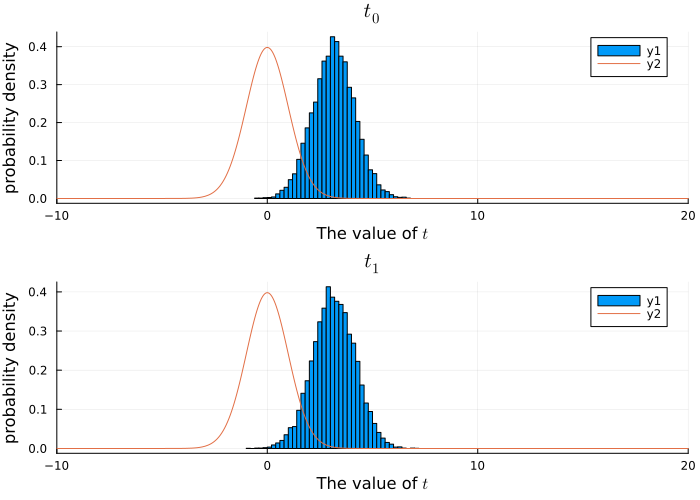

In [14]:
function regression(X::Matrix,y::Array)
    beta = (X' * X)^(-1) * X' * y;
    RSS = norm(y - X * beta)^2;
    RSE = sqrt(RSS / (N - pa1));
    B = (X' * X)^(-1);
    # B_1, B_0 = diag(B);
    se = RSE * sqrt.(diag(B));
    t = beta ./ se;
    p = 2 * (1 .- cdf.(TDist(N - pa1), abs.(t)));
    return r_result(beta, RSS, RSE,diag(B),se,t,p)
end



r = 10000
t0 = zeros(r)
t1 = zeros(r)
for i in 1:r
    N = 1000
    x = randn(N); e = randn(N);
    X = hcat(ones(length(x)),x);
    y = 0.1x .+ 0.1 .+  e;
    t0[i] = regression(X,y).t[1] 
    t1[i] = regression(X,y).t[2] 
end

default()
default(xlabel="The value of "*L"t", ylabel="probability density")
fig1 = histogram(t0, normalize=true, xlims=[-10,20])
plot!(x -> pdf(TDist(100-2),x), title=L"t_0")

fig2 = histogram(t1, normalize=true, xlims=[-10,20])
plot!(x -> pdf(TDist(100-2),x), title=L"t_1")

plot(fig1,fig2, layout=(2,1), size=(700,500))

In [15]:
N = 1000
x = randn(N)*100; e = randn(N)*10;
X = hcat(ones(length(x)),x);
y = 0.1*x .+ 0.1 .+  e;

print(regression(X,y).beta)

[-0.5358203868839053, 0.10722962073601856]

## 2.5 决定系数与多重共线性的判断
### 2.5.1 决定系数 $R^2$
- $\boldsymbol{W} \in \mathbb{R}^{N\times N}$  为元素均为 $1/N$ 的方阵，因此，有 $\boldsymbol{Wy}\in \mathbb{R}^{N},\quad \boldsymbol{\bar{y}} = \boldsymbol{Wy}$ 
- 残差平方和($\text{RSS}$)，被解释的平方和($ESS$)与总平方和($TSS$)
    - $\displaystyle \text{RSS} = \Vert \boldsymbol{\hat{y}} - \boldsymbol{y}\Vert^{2} = \Vert (\boldsymbol{I} - \boldsymbol{H})\boldsymbol{\epsilon}\Vert^{2} =\Vert (\boldsymbol{I} - \boldsymbol{H})\boldsymbol{y}\Vert^{2}$ 
    - $\displaystyle \text{ESS} \coloneqq \Vert \boldsymbol{\hat{y}} - \boldsymbol{\bar{y}} \Vert^{2}  = \Vert \boldsymbol{\hat{y}} - \boldsymbol{Wy}\Vert^{2} = \Vert (\boldsymbol{H} - \boldsymbol{W})\boldsymbol{y}\Vert^{2}$
    - $\displaystyle \text{TSS}\coloneqq \Vert \boldsymbol{y} - \boldsymbol{\bar{y}}\Vert^{2} = \Vert(\boldsymbol{I}- \boldsymbol{W})\boldsymbol{y}\Vert^{2}$ 
    - 三者关系
      $$
      \text{TSS} = \text{ESS} + \text{RSS}
      $$
- $\text{ESS}$ 与 $\text{RSS}$ 的独立性证明
    - 欲证二者独立，则需计算二者的协方差矩阵，既 $(\boldsymbol{I} - \boldsymbol{H})\boldsymbol{y}$ 与 $(\boldsymbol{H} - \boldsymbol{W})\boldsymbol{y}$ 的协方差矩阵为 $\boldsymbol{0}$ ，因为 $\boldsymbol{y} = \boldsymbol{X\beta} + \boldsymbol{\epsilon}$，所以，二者的变异分别可表示为 $(\boldsymbol{I}-\boldsymbol{H})\boldsymbol{\epsilon}$ 和 $(\boldsymbol{H} - \boldsymbol{W})\boldsymbol{\epsilon}$，因此，二者的协方差矩阵
    $$
    \begin{split}
    E(\boldsymbol{I} - \boldsymbol{H})\boldsymbol{\epsilon}[(\boldsymbol{H} - \boldsymbol{W})\boldsymbol{\epsilon}]^{\text{T}} &\xlongequal{\boldsymbol{W}^{\text{T}}=\boldsymbol{W}} E(\boldsymbol{I} - \boldsymbol{H})\boldsymbol{\epsilon\epsilon}^{\text{T}}(\boldsymbol{H} - \boldsymbol{W})\\
    & = \sigma^{2}(\boldsymbol{I} - \boldsymbol{H})(\boldsymbol{H} -\boldsymbol{W}) \\
    & \xlongequal{\boldsymbol{HW} = \boldsymbol{W}} \boldsymbol{0}
    \end{split}
    $$
- 决定系数 $R^{2}$ 
    $$
    R^{2} = \frac{\text{ESS}}{\text{TSS}} = 1 - \frac{\text{RSS}}{\text{TSS}}
    $$
    - $R^{2}$ 与 相关系数 $\hat{\rho}$ (一元回归)
    - 由 $\hat{y} - \bar{y} = \hat{\beta}_{1}(x - \bar{x})$，可得
        - $\Vert \boldsymbol{\hat{y}} - \boldsymbol{\bar{y}}\Vert^{2} = \hat{\beta}_{1}^{2}\Vert \boldsymbol{x} - \boldsymbol{\bar{x}}\Vert^{2}$，因此
        $$
        \begin{split}
          \frac{\text{ESS}}{\text{TSS}} & = \frac{\Vert \boldsymbol{\hat{y}} - \boldsymbol{\bar{y}} \Vert^{2}}{\Vert \boldsymbol{y} - \boldsymbol{\bar{y}} \Vert^{2}} = \frac{\hat{\beta}_{1}^{2}\Vert \boldsymbol{x} - \boldsymbol{\bar{x}} \Vert^{2}}{\Vert \boldsymbol{y} - \boldsymbol{\bar{y}} \Vert^{2}} = \left\{\frac{\displaystyle \sum_{i=1}^{N}(x_{i} - \bar{x})(y_{i}-\bar{y})}{\displaystyle \sum_{i=1}^{N}(x_{i}-\bar{x})^{2}}\right\}\frac{\displaystyle \sum_{i=1}^{N}(x_{i}-\bar{x})^{2}}{\displaystyle \sum_{i=1}^{N}(y_{i} - \bar{y})^{2}} \\
          & = \left\{\frac{\displaystyle \sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\displaystyle \sqrt{\sum_{i=1}^{N}(x_{i}-\bar{x})^{2}\sum_{i=1}^{N}(y_{i}-\bar{y})^{2}}}\right\}^{2} = \hat{\rho}^{2}
        \end{split}
        $$
- 经调整的决定系数
    $$
    1 - \frac{\text{RSS}/(N-p-1)}{\text{TSS}/(N-1)}
    $$
    - 对于简单地决定系数，协变量越多，$R^{2}$ 越大，但调整的决定系数，会对不必要协变量的引入进行“惩罚”

In [16]:
function R2(x,y)
    n=size(x)[1];
    X=hcat(ones(n),x);
    beta = inv(X'*X)*X'*y;
    y_hat = X*beta;
    y_bar = mean(y);
    RSS = norm(y .- y_hat)^2;
    TSS = norm(y .- y_bar)^2;
    return 1 - RSS/TSS
end

R2(x,y)

0.5442834098587881

In [17]:
using Random, Plots, LinearAlgebra, Distributions, CSV, DataFrames, Statistics, LaTeXStrings
df = DataFrame(CSV.File("../data/linearRegression.csv"));
x = df[:,:x]; y = df[:,:y];

R2(x,y)

0.9364779521605536

In [18]:
using GLM
lm(@formula(y~x),df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

y ~ 1 + x

Coefficients:
───────────────────────────────────────────────────────────────────────
               Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────
(Intercept)  1.78657    0.553337   3.23    0.0017   0.688488    2.88465
x            9.65014    0.253883  38.01    <1e-59   9.14632    10.154
───────────────────────────────────────────────────────────────────────

In [19]:
cor(hcat(x, y)) .^ 2


2×2 Matrix{Float64}:
 1.0       0.936478
 0.936478  1.0

### 2.5.2 多重共线性的判断 $\text{VIF}$
- 方差膨胀因子 (Variance inflation factors, VIF)
    - 用于衡量每个协变量的冗余性，当其他变量出现时
        $$
        \text{VIF}\coloneqq \frac{1}{1-R^2_{\boldsymbol{X}_j\vert \boldsymbol{X}_{-j}}}
        $$
        - $R^2_{\boldsymbol{X}_j\vert\boldsymbol{X}_{-j}}$ 表示第 $j$ 个变量为因变量，其余变量为自变量，进行线性回归的 $R^2$
    - VIF 越大，说明该变量越冗余，也说明多重共线性越强

In [20]:
using Plots, PyCall
dt = pyimport("sklearn.datasets");
boston = dt.load_boston();
x = boston["data"];
size(x)

/home/zpp/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing data

(506, 13)

In [21]:
function VIF(x::Matrix)
    p = size(x)[2]
    values = []
    for j = 1:p
        S = setdiff(collect(1:p), j)
        push!(values, 1 / (1 - R2(x[:, S], x[:, j])))
    end
    return values
end


VIF (generic function with 1 method)

In [22]:
@time VIF(x)

  0.342273 seconds (154.55 k allocations: 9.332 MiB, 98.65% compilation time)


13-element Vector{Any}:
 1.792191547433241
 2.298758178749441
 3.9915964183460297
 1.0739953275537883
 4.393719847577495
 1.933744435783257
 3.1008255128153372
 3.9559449063727263
 7.484496335274472
 9.00855394759707
 1.7990840492488984
 1.3485210764063755
 2.9414910780919348

In [23]:
setdiff(collect(1:10),[9])

9-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
 10

## 2.6 置信区间与区间估计
> 此部分主要关于对于给一组新数据 $\boldsymbol{x}_{*}$ 对 $\boldsymbol{x}_{*}\boldsymbol{\beta}$ 及 $\boldsymbol{y}_{*} = \boldsymbol{x}_{*}\boldsymbol{\beta} + \boldsymbol{\epsilon}$ 进行区间估计
- 对 $\boldsymbol{\beta}_{i}$ 的区间估计
  $$
  \boldsymbol{\beta}_{i} = \boldsymbol{\hat{\beta}}_{i} \pm t_{N-p-1}(\alpha/2)SE(\boldsymbol{\hat{\beta}}_{i})
  $$
- 在此部分，我们希望得到 $\boldsymbol{x}_{*}\boldsymbol{\hat{\beta}}$ 的置信区间，其中 $\boldsymbol{x}_{*}\in \mathbb{R}^{p+1}$ 且为第一个元素为 $1$ 的行向量，且于用于估计的 $\boldsymbol{x}_{1},\cdots, \boldsymbol{x}_{N}$ 不同
    - $E[\boldsymbol{x}_{*}\boldsymbol{\hat{\beta}}] = \boldsymbol{x}_{*}E[\boldsymbol{\hat{\beta}}]$ 
    - $D[\boldsymbol{x}_{*}\boldsymbol{\hat{\beta}}] = \boldsymbol{x}_{*}D(\boldsymbol{\hat{\beta}})\boldsymbol{x}_{*}^{\text{T}} = \sigma^{2}\boldsymbol{x}_{*}(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{x}_{*}^{\text{T}}$ 
    - 此处 $\sigma$ 的估计值 $\hat{\sigma} \coloneqq \sqrt{\text{RSS}/(N-p-1)}$ ，由此可得 
    $$
    SE(\boldsymbol{x}_{*}\boldsymbol{\hat{\beta}}) = \hat{\sigma}\sqrt{\boldsymbol{x}_{*}(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{x}_{*}^{\text{T}}}
    $$
    - $C$ 
    $$
    \begin{split}
    C&\coloneqq \frac{\boldsymbol{x}_{*}\boldsymbol{\hat{\beta}}-\boldsymbol{x}_{*}\boldsymbol{\beta}}{SE(\boldsymbol{x}_{*}\boldsymbol{\hat{\beta}})} = \frac{\boldsymbol{x}_{*}\boldsymbol{\hat{\beta}}-\boldsymbol{x}_{*}\boldsymbol{\beta}}{\hat{\sigma} \sqrt{\boldsymbol{x}_{*}(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{x}_{*}^{\text{T}}}} \\
    & = \frac{\boldsymbol{x}_{*}\boldsymbol{\hat{\beta}}-\boldsymbol{x}_{*}\boldsymbol{\beta}}{{\sigma} \sqrt{\boldsymbol{x}_{*}(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{x}_{*}^{\text{T}}}} \bigg/\sqrt{\frac{\text{RSS}}{\sigma^{2}}\big/(N-p-1)} \sim t_{N-p-1}
    \end{split}
    $$
- 基于以上，考虑上 $\boldsymbol{y}_{*} = \boldsymbol{x}_{*}\boldsymbol{\beta}  + \boldsymbol{\epsilon}$，则有
    $$
    \begin{split}
    D[\hat{\boldsymbol{y}}_{*} - \boldsymbol{y}_{*}]&=D[\boldsymbol{x}_{*}\boldsymbol{\hat{\beta}} - (\boldsymbol{x}_{*}\boldsymbol{\beta}+\boldsymbol{\epsilon})] = D[\boldsymbol{x}_{*}(\boldsymbol{\hat{\beta}} - \boldsymbol{\beta})] + D[\boldsymbol{\epsilon}] \\
    & = \sigma^{2}\boldsymbol{x}_{*}(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{x}_{*}^{\text{T}} + \sigma^{2}\boldsymbol{I}
    \end{split}
    $$
    - 类似以上可得 $P$ 
        $$
        \begin{split}
          P &\coloneqq \frac{\boldsymbol{x}_{*}\boldsymbol{\hat{\beta}} - \boldsymbol{y}_{*}}{SE(\boldsymbol{x}_{*}\boldsymbol{\hat{\beta}}- \boldsymbol{y}_{*})} = \frac{\boldsymbol{x}_{*}\boldsymbol{\hat{\beta}} - \boldsymbol{y}_{*}}{\hat{\sigma}\sqrt{1 + \boldsymbol{x}_{*}(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{x}_{*}^{\text{T}}}} \\
          & = \frac{\boldsymbol{x}_{*}\boldsymbol{\hat{\beta}} - \boldsymbol{y}_{*}}{\sigma\sqrt{1 + \boldsymbol{x}_{*}(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{x}_{*}^{\text{T}}}}\bigg/\sqrt{\frac{\text{RSS}}{\sigma^{2}}\big/(N-p-1)} \sim t_{N-p-1}
        \end{split}
        $$
- 基于以上，可得出 $\boldsymbol{x}_{*}\boldsymbol{\beta}$ 和 $\boldsymbol{y}_{*}$ 的区间估计
$$
\begin{split}
  \boldsymbol{x}_{*}\boldsymbol{\beta} & = \boldsymbol{x}_{*}\boldsymbol{\hat{\beta}} \pm t_{N-p-1}(\alpha/2)\hat{\sigma}\sqrt{\boldsymbol{x}_{*}(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{x}_{*}^{\text{T}}} \\
  \boldsymbol{y}_{*} & = \boldsymbol{x}_{*}\boldsymbol{\hat{\beta}} \pm t_{N-p-1}(\alpha/2)\hat{\sigma}\sqrt{1 + \boldsymbol{x}_{*}(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{x}_{*}^{\text{T}}}
\end{split}
$$

In [24]:
using Plots, Random, Distributions, LinearAlgebra, Statistics

N = 100;
p = 1;
x = rand(Normal(0, 1), N, p);
X = hcat(ones(N), x);
beta = [1, 1];
e = rand(Normal(0,1),N);
y = X * beta .+ e;


In [25]:
U = inv(X' * X)
beta_hat = U * X' * y
RSS = norm(y .- X * beta_hat)^2
RSE = sqrt(RSS / (N - p - 1))
alpha = 0.05

0.05

In [26]:
function f(x, a)
    x = vcat(1, x)'
    range = quantile(TDist(N - p - 1), 0.975) * sqrt(a + x * inv(X' * X) * x')
    return [x * beta_hat - range, x * beta_hat + range]
end


f (generic function with 2 methods)

In [27]:
x_seq = collect(-10:0.1:10);
lower_seq1 = [];
upper_seq1 = [];
for i in x_seq
    push!(lower_seq1, f(i, 0)[1])
    push!(upper_seq1, f(i, 0)[2])
end

lower_seq2 = [];
upper_seq2 = [];
for i in x_seq
    push!(lower_seq2, f(i, 1)[1])
    push!(upper_seq2, f(i, 1)[2])
end


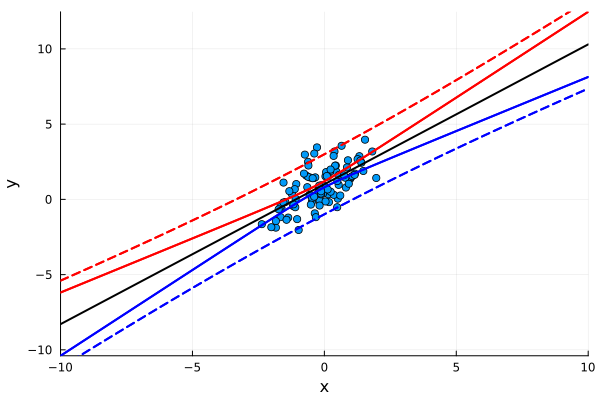

In [28]:
default()
default(
    xlims = [minimum(x_seq), maximum(x_seq)],
    ylims = [minimum(lower_seq1), maximum(upper_seq1)],
    xlabel = 'x',
    ylabel = 'y',
)
scatter(x, y, label = "")
plot!(x_seq, hcat(ones(length(x_seq)), x_seq) * beta_hat, c = :black, lw = 2, label = "")
plot!(x_seq, lower_seq1, c = :blue, lw = 2, label = "")
plot!(x_seq, upper_seq1, c = :red, lw = 2, label = "")
plot!(x_seq, lower_seq2, c = :blue, lw = 2, label = "", ls = :dash)
plot!(x_seq, upper_seq2, c = :red, lw = 2, label = "", ls = :dash)
plot!(x_seq, lower_seq1, c = :blue, lw = 2, label = "")
plot!(x_seq, upper_seq1, c = :red, lw = 2, label = "")
plot!(x_seq, lower_seq2, c = :blue, lw = 2, label = "", ls = :dash)
plot!(x_seq, upper_seq2, c = :red, lw = 2, label = "", ls = :dash)